#**Data Preprocessing**


In [9]:
!conda install seaborn -y
!conda install scikit-learn -y


Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.

Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [10]:
# # #step 1: importing library
# # import pandas as pd
# # import numpy as np
# # import seaborn as sns
# # import matplotlib.pyplot as plt
# # import cuml
# # from cuml.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
# # from cuml.model_selection import train_test_split
# # from cuml.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
# # from cuml.ensemble import RandomForestRegressor, GradientBoostingRegressor
# # from cuml.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


import cudf
import cuml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model imports from cuML and scikit-learn
from cuml import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor  # CPU version from scikit-learn
from cuml.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  # CPU version from scikit-learn
from cuml.linear_model import Ridge
from cuml.model_selection import train_test_split
from cuml.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Verify installed versions of cudf and cuml
print(cudf.__version__)  # Should print the version of cudf
print(cuml.__version__)  # Should print the version of cuml
#step 1: importing library
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


23.12.01
23.12.00


In [11]:
!nvidia-smi 

Tue Mar  4 20:38:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.17              Driver Version: 572.47         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080 ...    On  |   00000000:01:00.0  On |                  N/A |
|  0%   37C    P8              7W /  320W |    1776MiB /  16376MiB |     21%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

####Reading Data

In [75]:
#step 2 Reading Data
df1=pd.read_csv('422 datasets/madrid_2001.csv')
df2=pd.read_csv('422 datasets/madrid_2002.csv')
df3=pd.read_csv('422 datasets/madrid_2003.csv')
df4=pd.read_csv('422 datasets/madrid_2004.csv')
df5=pd.read_csv('422 datasets/madrid_2005.csv')
df6=pd.read_csv('422 datasets/madrid_2006.csv')
df7=pd.read_csv('422 datasets/madrid_2007.csv')
df8=pd.read_csv('422 datasets/madrid_2008.csv')
df9=pd.read_csv('422 datasets/madrid_2009.csv')
df10=pd.read_csv('422 datasets/madrid_2010.csv')
df11=pd.read_csv('422 datasets/madrid_2011.csv')
df12=pd.read_csv('422 datasets/madrid_2012.csv')
df13=pd.read_csv('422 datasets/madrid_2013.csv')
df14=pd.read_csv('422 datasets/madrid_2014.csv')
df15=pd.read_csv('422 datasets/madrid_2015.csv')
df16=pd.read_csv('422 datasets/madrid_2016.csv')
df17=pd.read_csv('422 datasets/madrid_2017.csv')
df18=pd.read_csv('422 datasets/madrid_2018.csv')

df=pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9, df10, df11,df12,df13,df14,df15,df16, df17,df18], axis=0)
df = df.reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df_init=df.copy()

In [13]:
print('Features:')
for i,j in enumerate(df.columns):
  print(i+1,'->',j)

Features:
1 -> date
2 -> BEN
3 -> CO
4 -> EBE
5 -> MXY
6 -> NMHC
7 -> NO_2
8 -> NOx
9 -> OXY
10 -> O_3
11 -> PM10
12 -> PXY
13 -> SO_2
14 -> TCH
15 -> TOL
16 -> station
17 -> PM25
18 -> NO
19 -> CH4


####First Five Value


In [14]:
df.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
1,2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


####Last Five Values

In [15]:
df.tail()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01,NaN,0.5,NaN,NaN,NaN,91.0,192.0,NaN,1.0,35.0,NaN,NaN,NaN,NaN,28079056,22.0,66.0,NaN
3808220,2018-02-01,NaN,0.7,NaN,NaN,NaN,107.0,241.0,NaN,NaN,29.0,NaN,15.0,NaN,NaN,28079057,NaN,87.0,NaN
3808221,2018-02-01,NaN,NaN,NaN,NaN,NaN,48.0,91.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,NaN,28.0,NaN
3808222,2018-02-01,NaN,NaN,NaN,NaN,NaN,103.0,320.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079059,NaN,141.0,NaN
3808223,2018-02-01,NaN,NaN,NaN,NaN,NaN,96.0,202.0,NaN,3.0,26.0,NaN,NaN,NaN,NaN,28079060,NaN,69.0,NaN


####Description Of Dataset

In [16]:
#shape
print('Shape:(row,col)')
print(df.shape)
print('***'*10)
#information of the datas
print('Information:')
print(df.info())
print('***'*10)


Shape:(row,col)
(3808224, 19)
******************************
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   BEN      float64       
 2   CO       float64       
 3   EBE      float64       
 4   MXY      float64       
 5   NMHC     float64       
 6   NO_2     float64       
 7   NOx      float64       
 8   OXY      float64       
 9   O_3      float64       
 10  PM10     float64       
 11  PXY      float64       
 12  SO_2     float64       
 13  TCH      float64       
 14  TOL      float64       
 15  station  int64         
 16  PM25     float64       
 17  NO       float64       
 18  CH4      float64       
dtypes: datetime64[ns](1), float64(17), int64(1)
memory usage: 552.0 MB
None
******************************


#Visualizing Data

####Dsecription of the Data

In [17]:
#descriptive statistics (numerical)
print(df.describe().T)

             count          mean         std          min          25%  \
BEN      1041684.0  1.257431e+00    1.910831         0.00         0.21   
CO       2651012.0  5.503838e-01    0.535448         0.00         0.26   
EBE      1001724.0  1.407927e+00    2.146109         0.00         0.35   
MXY       315415.0  4.650394e+00    5.599223         0.00         1.20   
NMHC     1085312.0  1.873865e-01    0.153953         0.00         0.09   
NO_2     3787050.0  5.047151e+01   34.552876         0.00        24.00   
NOx      2376275.0  1.093188e+02  110.287083         0.00        40.00   
OXY       315695.0  2.280912e+00    2.639609         0.00         0.96   
O_3      2991732.0  3.982616e+01   30.392489         0.00        12.71   
PM10     2861255.0  2.893654e+01   25.948586         0.00        11.50   
PXY       315584.0  2.056178e+00    2.395130         0.00         0.80   
SO_2     2775960.0  1.065539e+01    9.121267         0.00         5.84   
TCH      1086441.0  1.435882e+00    0.

###Histogram to understand the distribution

In [19]:
#step 4 exploratory Data Analysis (EDA)

#object value
print(df.describe(include='object'))
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

ValueError: No objects to concatenate

####KDE Plot for better understaning of Distribution

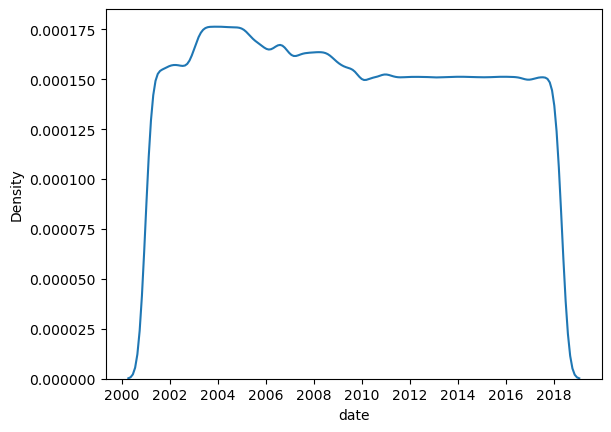

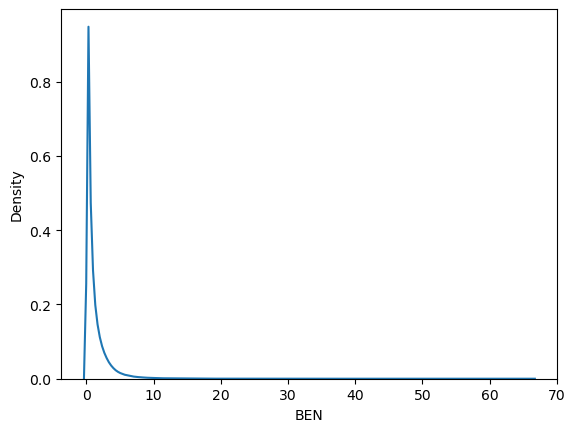

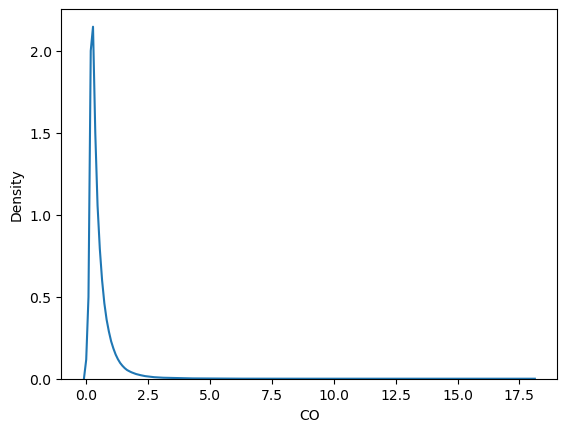

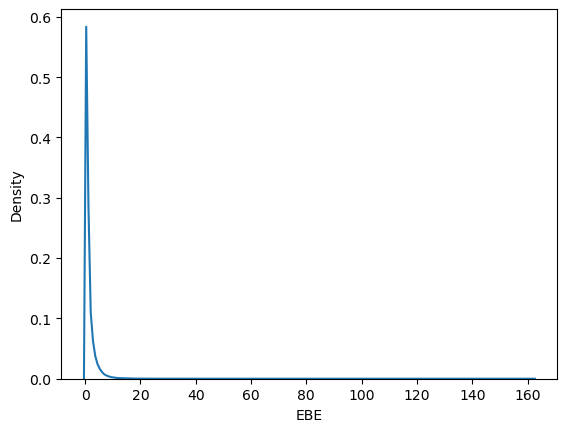

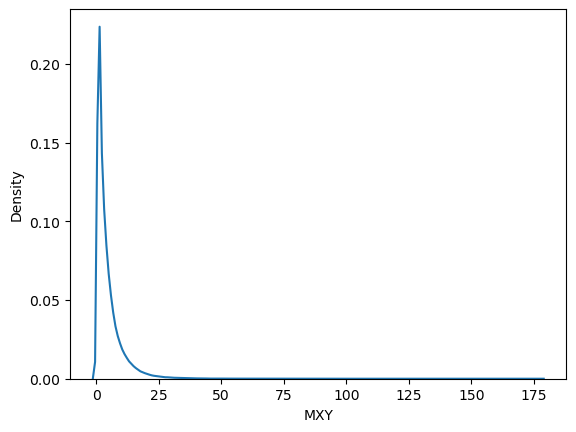

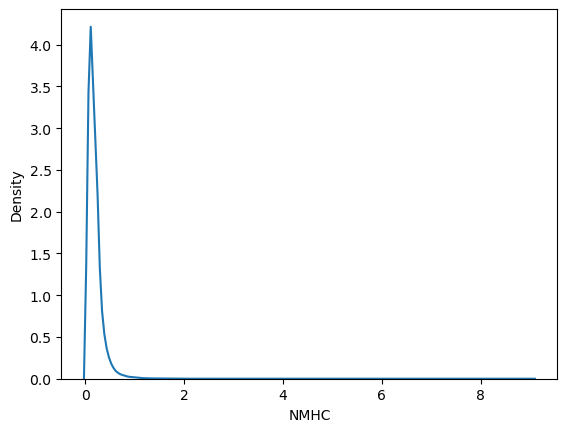

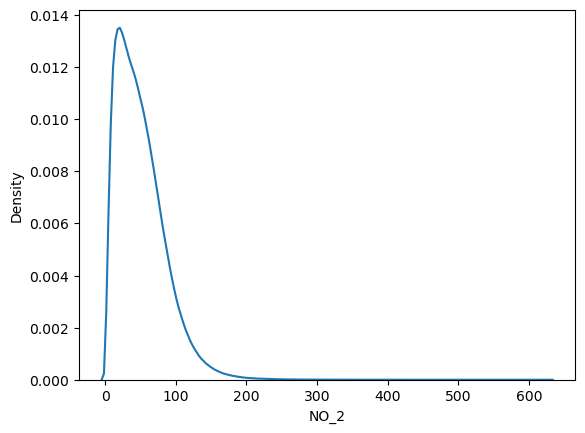

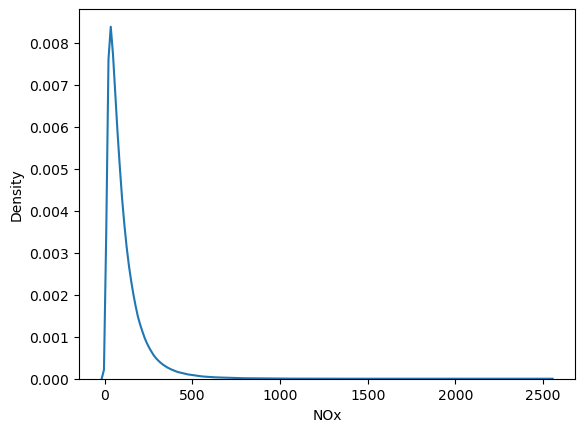

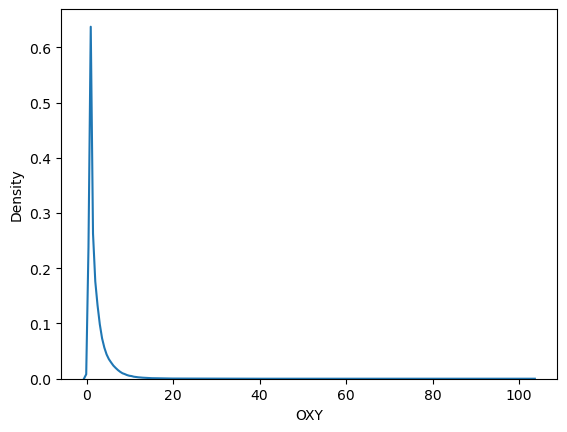

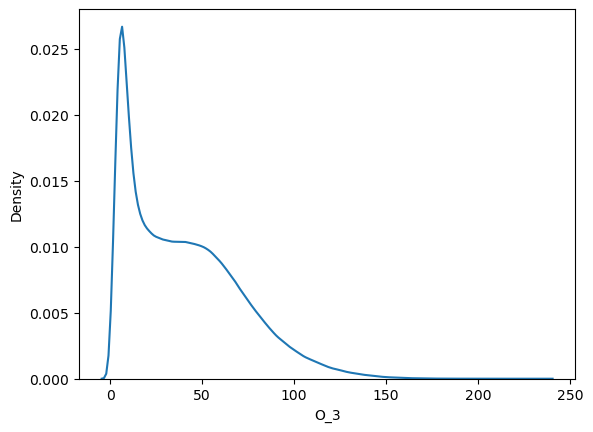

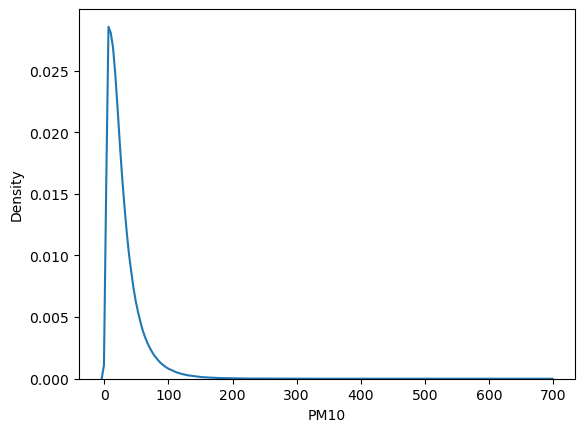

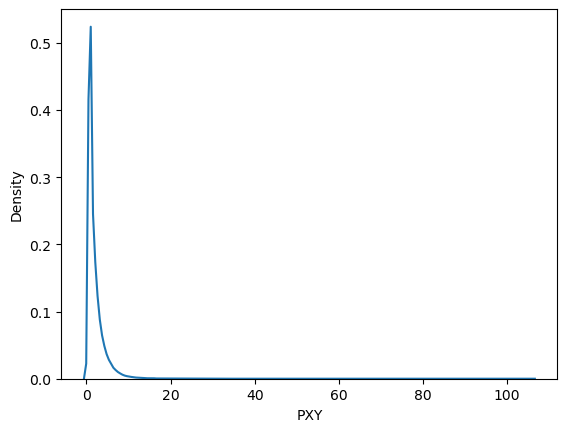

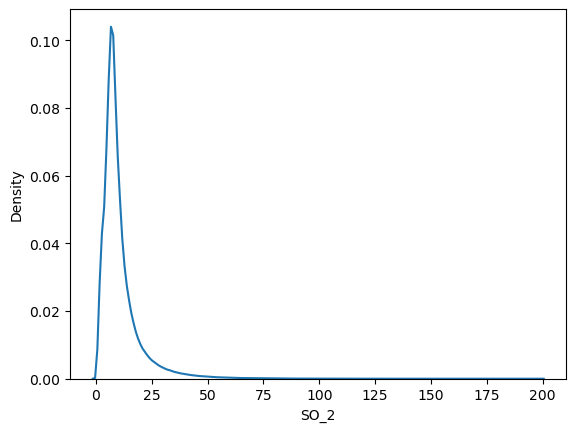

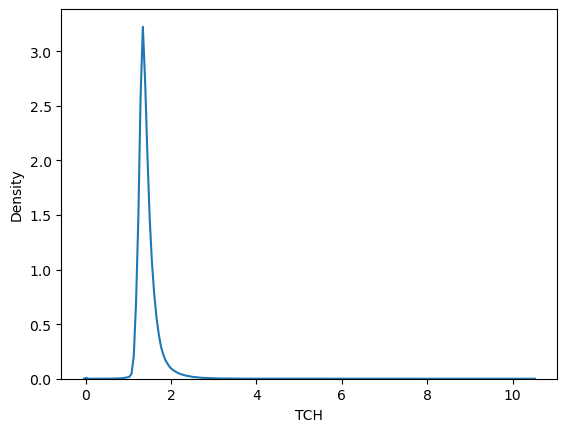

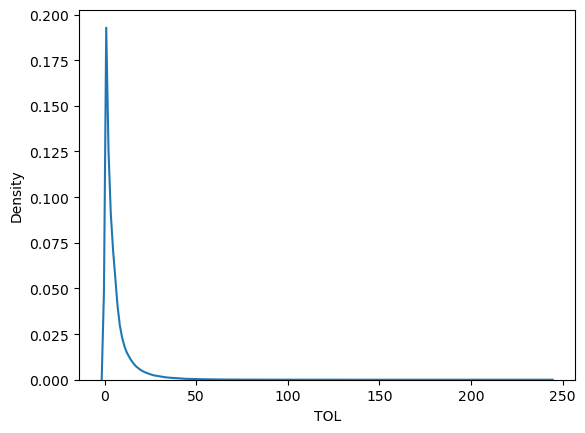

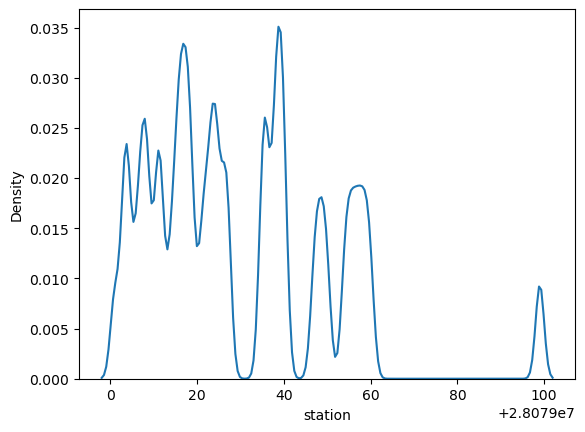

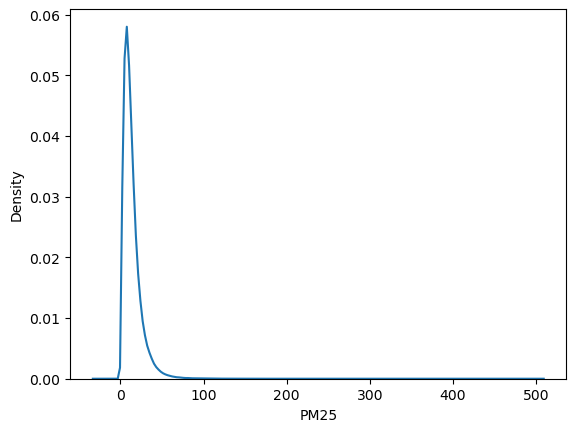

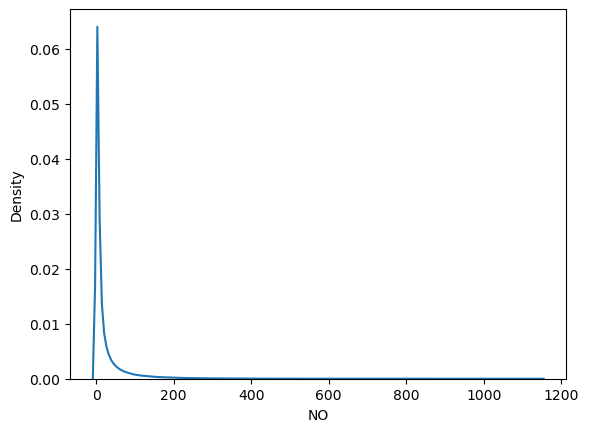

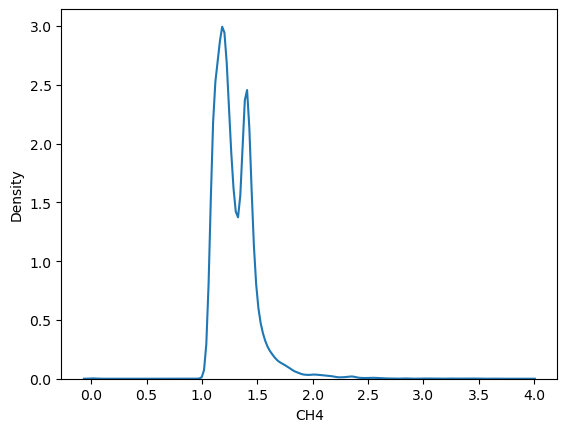

In [20]:
for i in df.select_dtypes(include=['number', 'datetime']).columns:
  sns.kdeplot(data=df, x=i)
  plt.show()

####Scatter plot to understanf the relationship

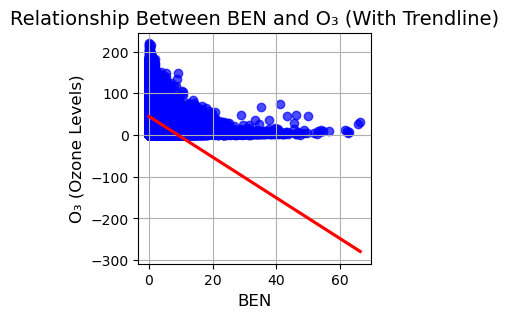

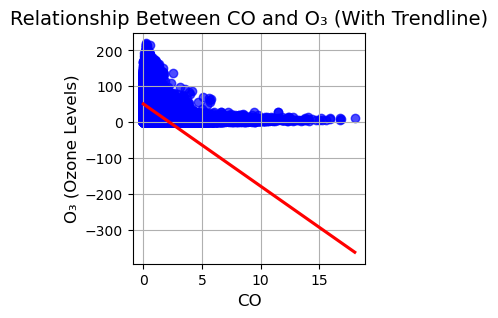

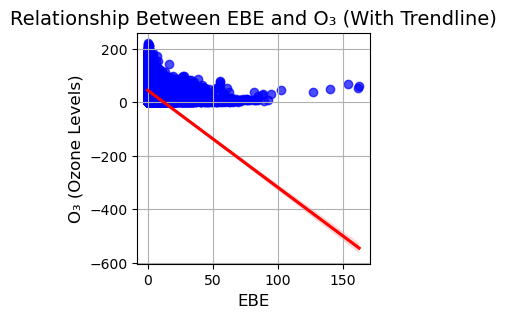

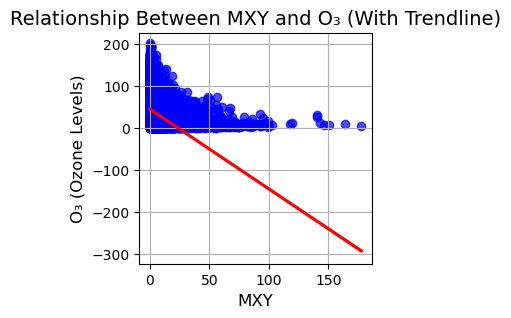

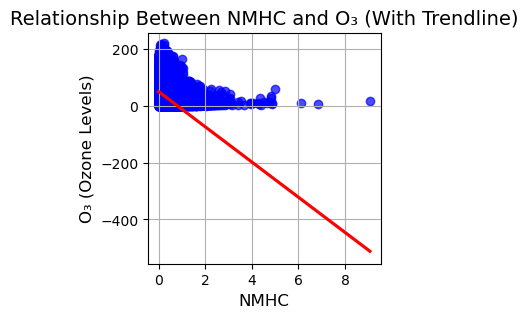

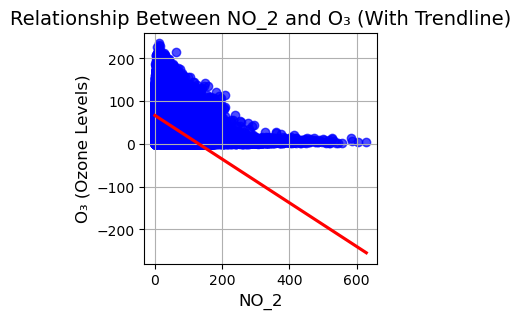

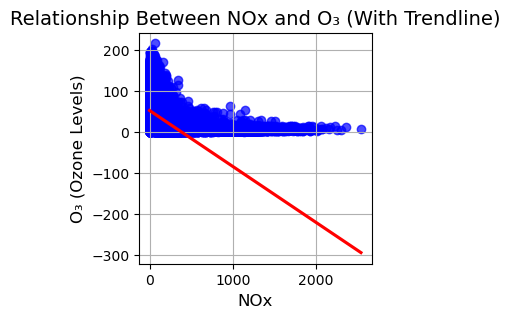

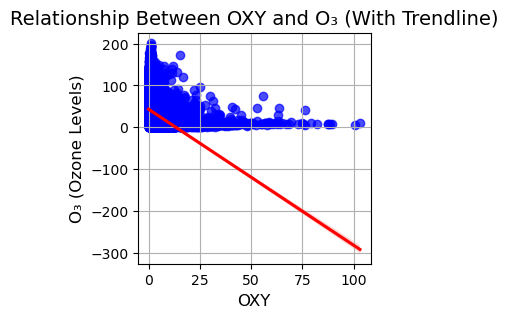

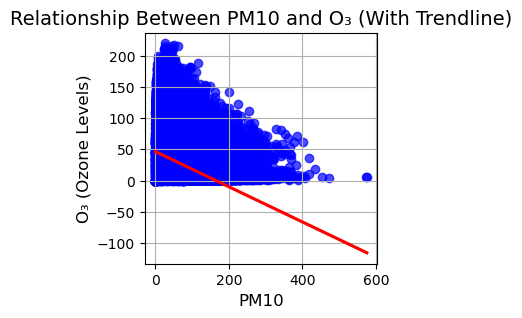

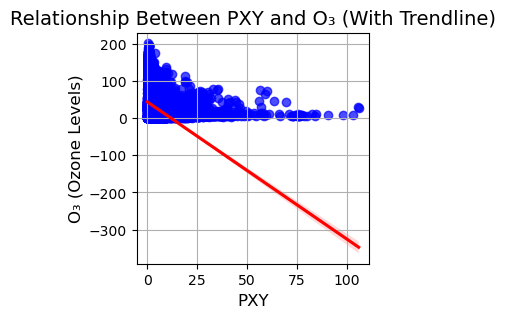

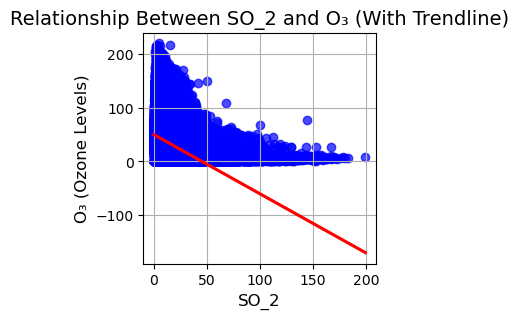

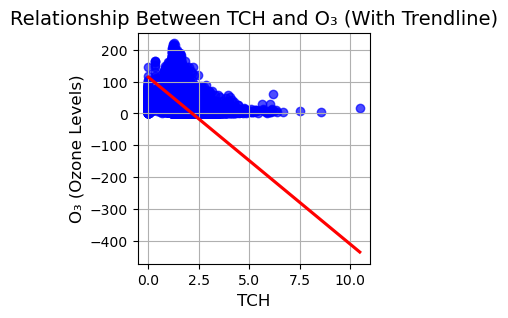

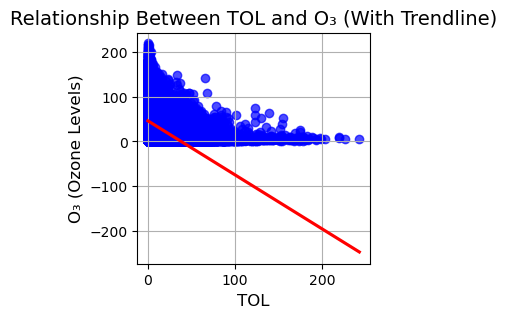

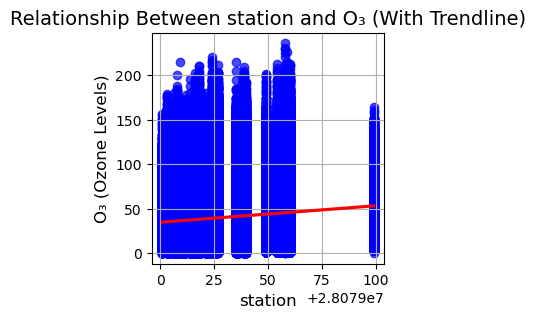

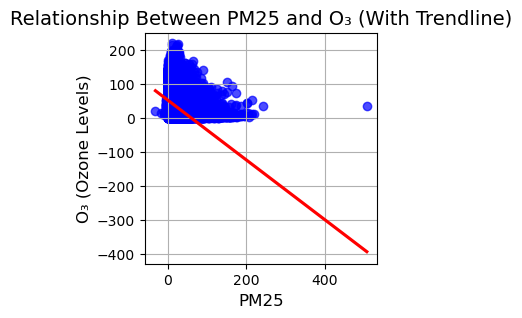

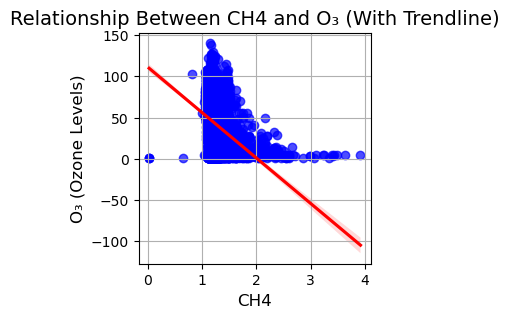

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

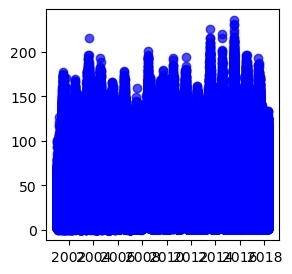

In [22]:
# # #scatter plot understand the relationship
## List of features to analyze


features = ['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station','PM25','CH4','date']

for feature in features:
        plt.figure(figsize=(3, 3))
        sns.regplot(
            data=df,
            x=feature,
            y='O_3',
            scatter_kws={'alpha': 0.7, 'color': 'blue'},
            line_kws={'color': 'red'}
        )
        plt.title(f'Relationship Between {feature} and O₃ (With Trendline)', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('O₃ (Ozone Levels)', fontsize=12)
        plt.grid(True)
        plt.show()


####Correlation with heatmap to intrepret the relation and multicollinarity

<Axes: >

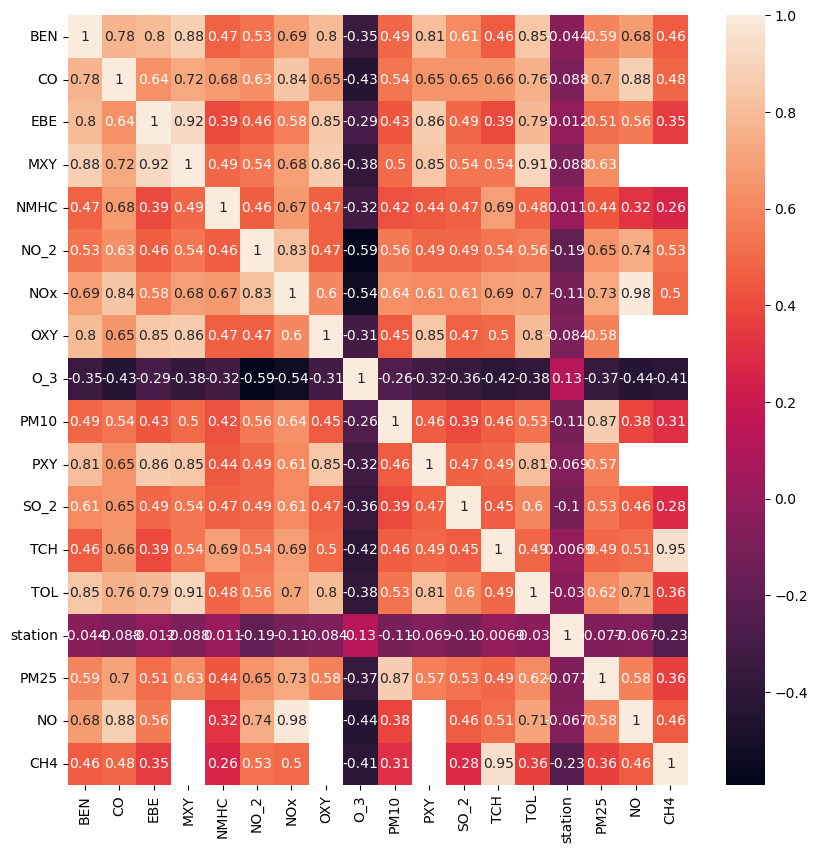

In [26]:
# correlation with heatmap to intrepret the relation and multicollinarity
corr=df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)


Features to REMOVE (Weak negative correlation): ['EBE', 'PM10', 'station']
Features to KEEP (Strong negative correlation): ['BEN', 'CO', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'PXY', 'SO_2', 'TCH', 'TOL', 'PM25', 'NO', 'CH4']


/tmp/ipykernel_3426/972237010.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


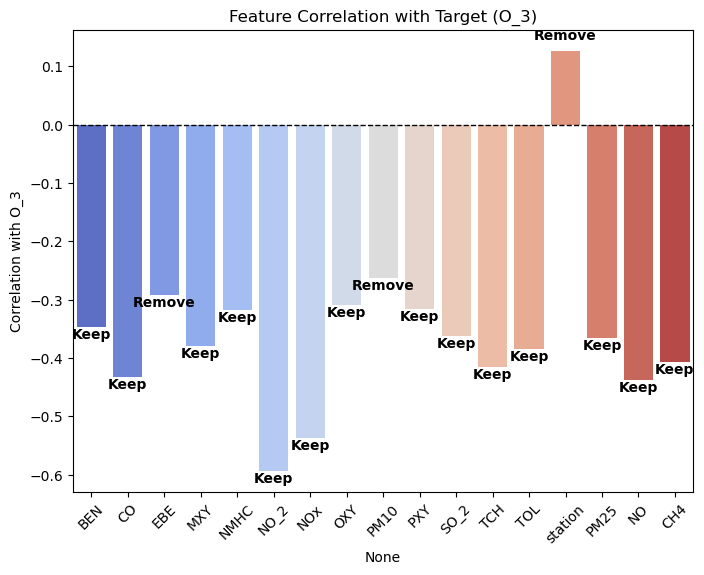

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define correlation threshold (adjustable)
correlation_threshold = 0.3  # Keep features with abs(correlation) >= 0.3

# Get correlations of all features with 'O_3', excluding itself
corr_with_target = corr["O_3"].drop("O_3")

# Select features with strong negative correlation (abs value high)
to_remove = corr_with_target[abs(corr_with_target) < correlation_threshold].index.tolist()
to_keep = corr_with_target[abs(corr_with_target) >= correlation_threshold].index.tolist()

# Print results
print("\nFeatures to REMOVE (Weak negative correlation):", to_remove)
print("Features to KEEP (Strong negative correlation):", to_keep)

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    x=corr_with_target.index,
    y=corr_with_target.values,
    palette="coolwarm"
)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line
plt.ylabel("Correlation with O_3")
plt.xticks(rotation=45)
plt.title("Feature Correlation with Target (O_3)")

# Annotate features to be removed
for i, v in enumerate(corr_with_target.values):
    plt.text(i, v + 0.02 if v > 0 else v - 0.02,  
             "Remove" if abs(v) < correlation_threshold else "Keep", 
             color="black", ha="center", fontsize=10, fontweight="bold")

plt.show()


###Finding the outliers of the dataset using BoxPlot

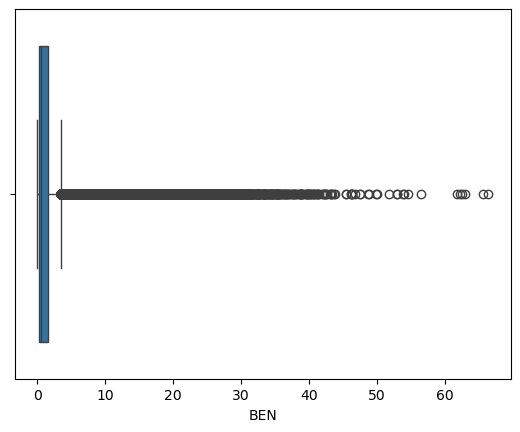

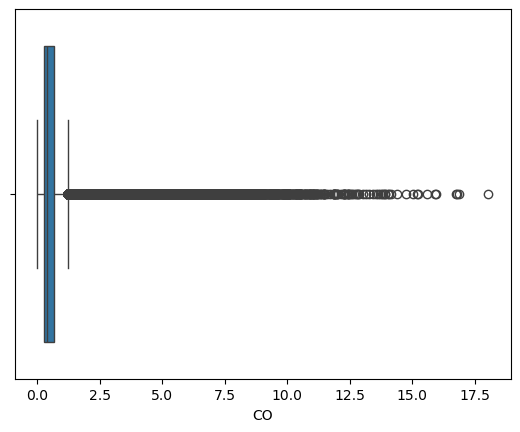

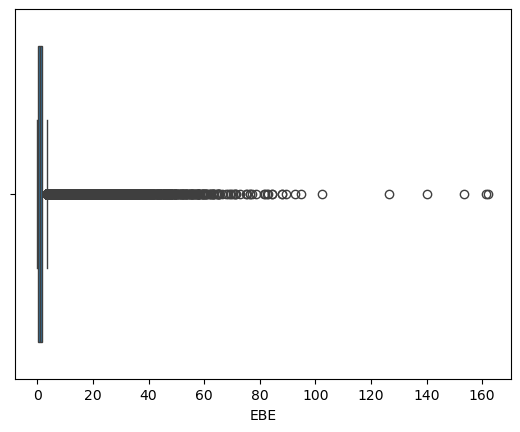

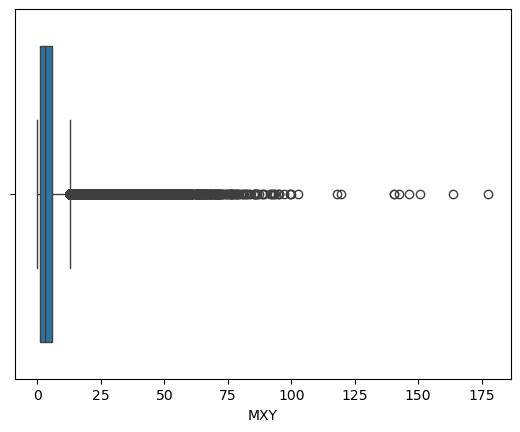

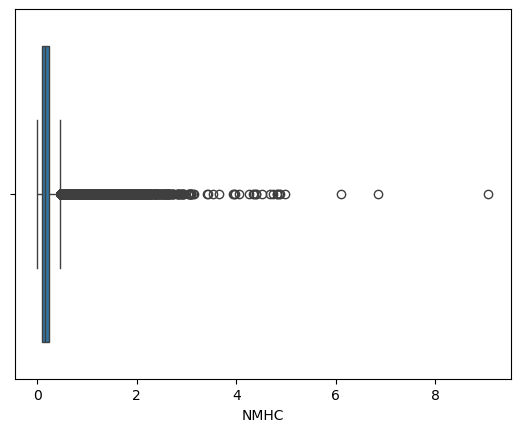

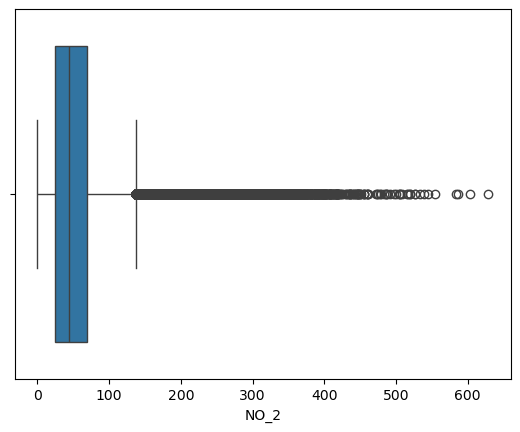

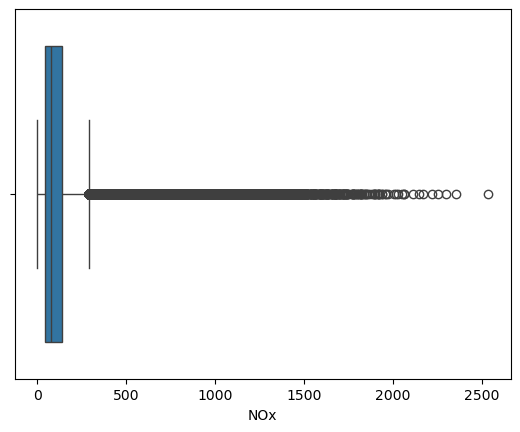

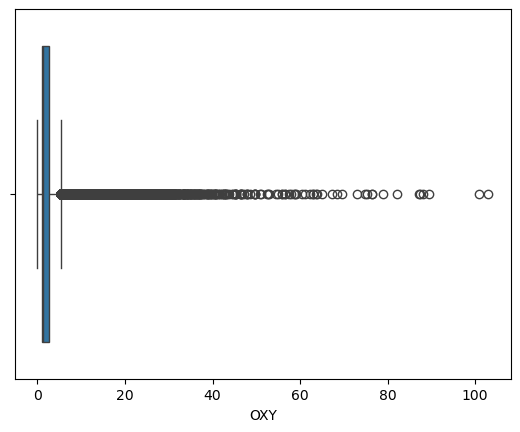

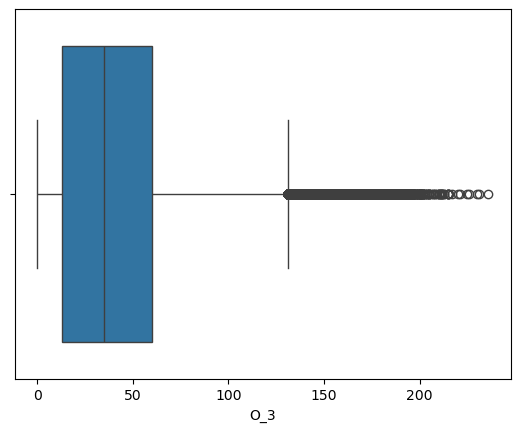

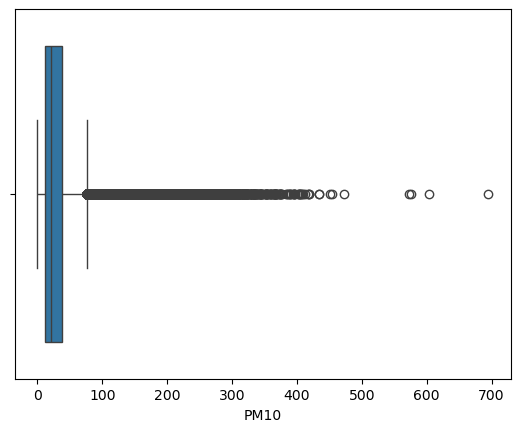

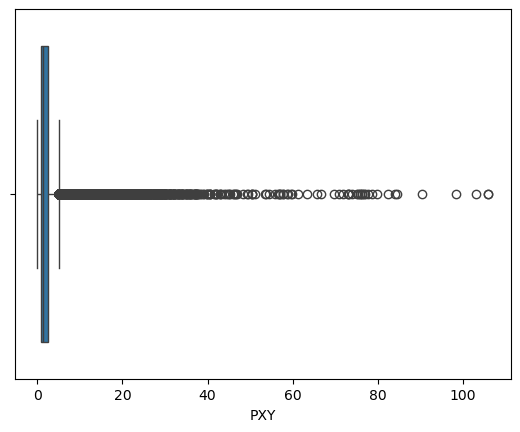

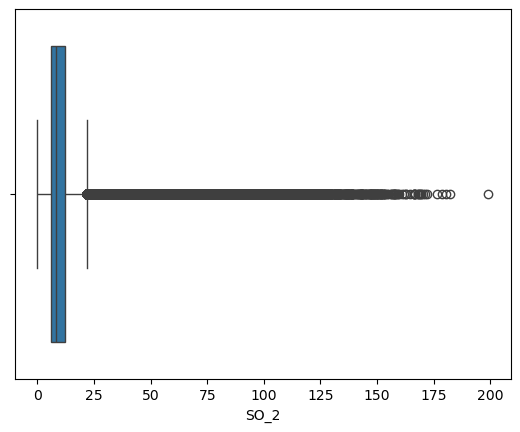

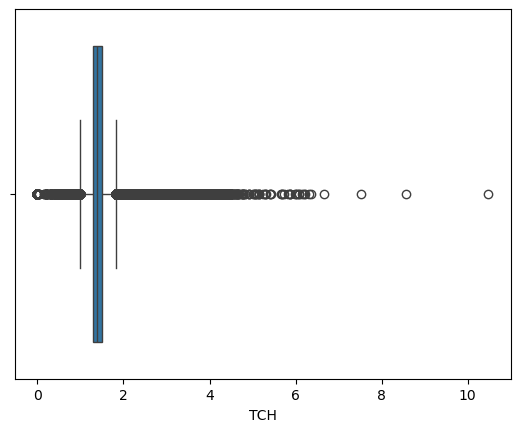

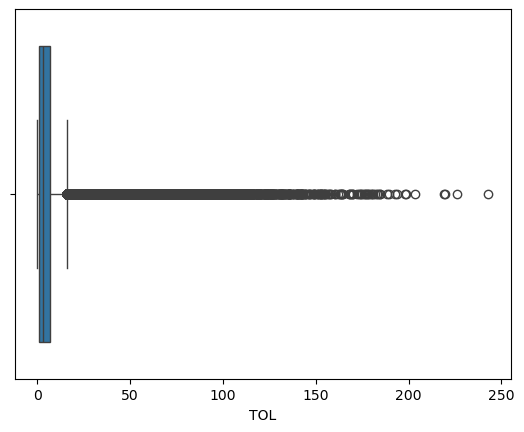

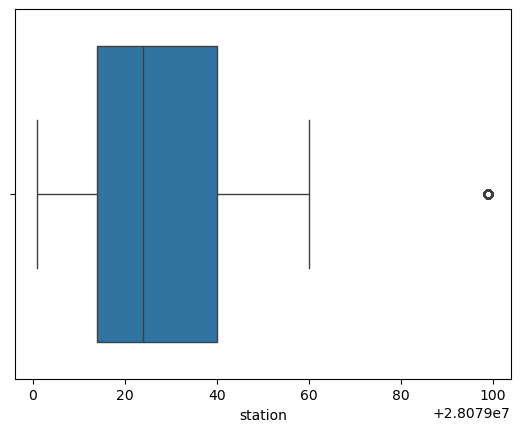

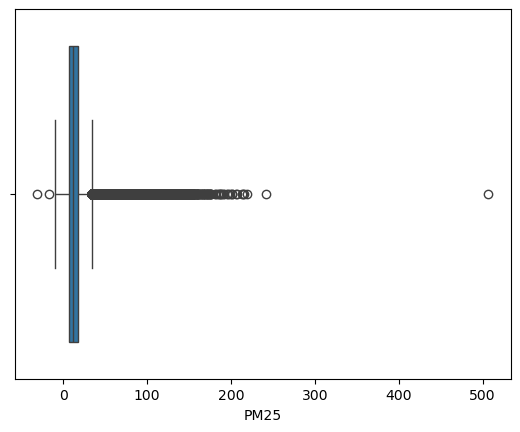

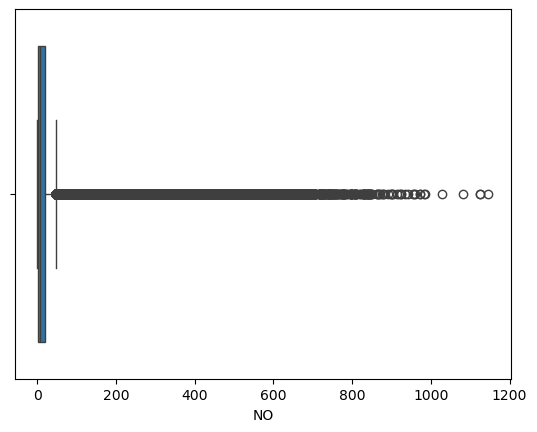

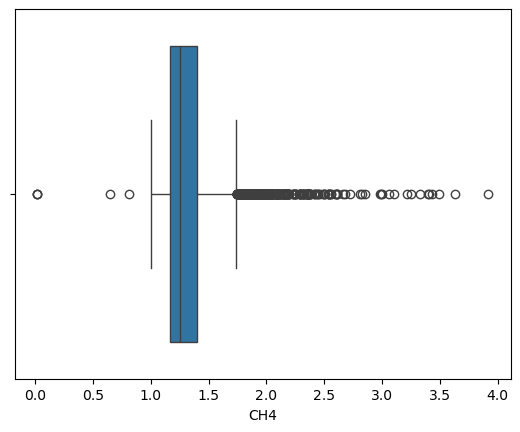

In [44]:
#box plot to understand the outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

#Data Cleaning

In [76]:
#finding missing value
print('Missing Value:')
print(df.isnull().sum())
print('***'*10)
#finding percantage of missing value
print('Percentage of Missing Value:')
print(df.isnull().sum()/df.shape[0]*100)
print('***'*10)
#finding duplicates
print('Duplicates:')
print(df.duplicated().sum())
print('***'*10)
#idenfying garbage value
print('Garbage Value:')
for i in df.select_dtypes(include='object').columns: #cz garbage are in object type value
   print(df[i].value_counts())
   print('***'*10)
# no garbage value as it would show in the last and show the character and the count also


Missing Value:
date             0
BEN        2766540
CO         1157212
EBE        2806500
MXY        3492809
NMHC       2722912
NO_2         21174
NOx        1431949
OXY        3492529
O_3         816492
PM10        946969
PXY        3492640
SO_2       1032264
TCH        2721783
TOL        2769295
station          0
PM25       2991800
NO         2275827
CH4        3793374
dtype: int64
******************************
Percentage of Missing Value:
date        0.000000
BEN        72.646462
CO         30.387183
EBE        73.695770
MXY        91.717530
NMHC       71.500836
NO_2        0.556007
NOx        37.601491
OXY        91.710178
O_3        21.440230
PM10       24.866421
PXY        91.713093
SO_2       27.106179
TCH        71.471190
TOL        72.718805
station     0.000000
PM25       78.561555
NO         59.760849
CH4        99.610054
dtype: float64
******************************
Duplicates:
0
******************************
Garbage Value:


###dropping these features since the missing values percentage is greater than 50% and there are no duplicate value and Garbage values in the dataset


In [77]:
df=df.drop(['EBE', 'PM10','station'], axis = 1)
df.head()
#[Dropping station as it is irrelevant for our analysis]

,date,BEN,CO,MXY,NMHC,NO_2,NOx,OXY,O_3,PXY,SO_2,TCH,TOL,PM25,NO,CH4
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,58.400002,87.150002,NaN,34.529999,NaN,6.34,NaN,NaN,NaN,NaN,NaN
1,2001-08-01 01:00:00,1.5,0.34,4.1,0.07,56.250000,75.169998,2.11,42.160000,1.73,8.11,1.24,10.82,NaN,NaN,NaN
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,50.660000,61.380001,NaN,46.310001,NaN,7.85,NaN,NaN,NaN,NaN,NaN
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,69.790001,73.449997,NaN,40.650002,NaN,6.46,NaN,NaN,NaN,NaN,NaN
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,22.830000,24.799999,NaN,66.309998,NaN,8.80,NaN,NaN,NaN,NaN,NaN


###Cleaning datas where target value (O_3) is Null

In [78]:
df= df.dropna(subset=['O_3']) #i deleted all null rows to check the result
# df= df.dropna(subset=['NO_2'])
# df= df.dropna(subset=['PM10'])
# df= df.dropna(subset=['CO'])
# df= df.dropna(subset=['SO_2'])

print('New Shape after dropping null rows of  value:')
df.shape

New Shape after dropping null rows of  value:


(2991732, 16)

###Imputing other NULL values using KNNI Imputer


In [79]:
df['CO'].fillna(df['CO'].mean(), inplace = True)
df['NO_2'].fillna(df['NO_2'].mean(), inplace = True)
df['SO_2'].fillna(df['SO_2'].mean(), inplace = True)

df['BEN'].fillna(df['BEN'].mean(), inplace = True)
df['MXY'].fillna(df['MXY'].mean(), inplace = True)
df['NMHC'].fillna(df['NMHC'].mean(), inplace = True)
df['NOx'].fillna(df['NOx'].mean(), inplace = True)


df['OXY'].fillna(df['OXY'].mean(), inplace = True)
df['PXY'].fillna(df['PXY'].mean(), inplace = True)
df['SO_2'].fillna(df['SO_2'].mean(), inplace = True)
df['TCH'].fillna(df['TCH'].mean(), inplace = True)


df['TOL'].fillna(df['TOL'].mean(), inplace = True)
df['PM25'].fillna(df['PM25'].mean(), inplace = True)
df['NO'].fillna(df['NO'].mean(), inplace = True)
df['CH4'].fillna(df['CH4'].mean(), inplace = True)

In [37]:
print('Result After imputing:\n',df.isnull().sum())
df.shape

Result After imputing:
 date    0
BEN     0
CO      0
MXY     0
NMHC    0
NO_2    0
NOx     0
OXY     0
O_3     0
PXY     0
SO_2    0
TCH     0
TOL     0
PM25    0
NO      0
CH4     0
dtype: int64


(2991732, 16)

### Caluculating wisker to treat outliers

In [81]:
#Outlier treatment
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  return lower_bound,upper_bound
df.columns

Index(['date', 'BEN', 'CO', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PXY',
       'SO_2', 'TCH', 'TOL', 'PM25', 'NO', 'CH4'],
      dtype='object')

###Treating those values which have outliers

In [82]:
for i in ['BEN', 'CO', 'MXY', 'NMHC','SO_2', 'PM25']:
  lw,uk=wisker(df[i])
  df[i]=np.where(df[i]>uk,uk,df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])

###Checking if outliers are fixed or not

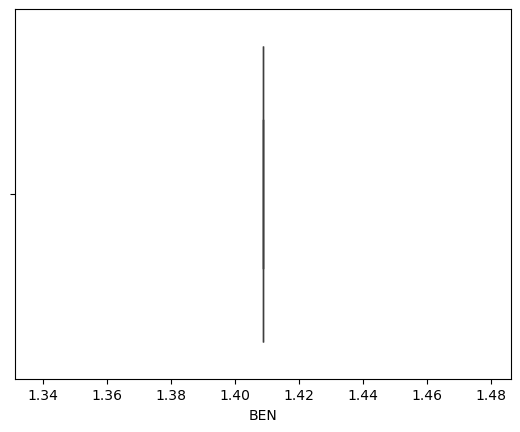

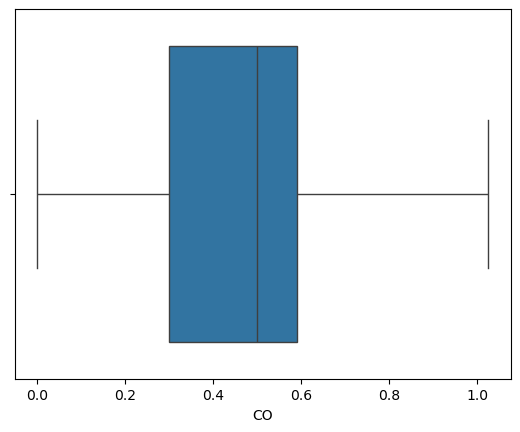

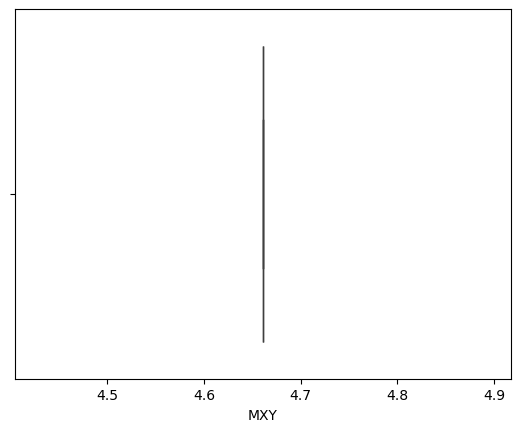

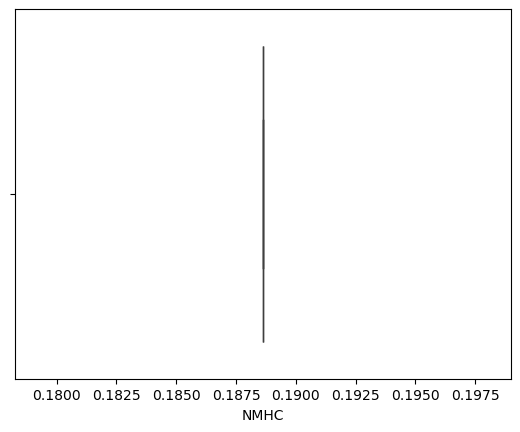

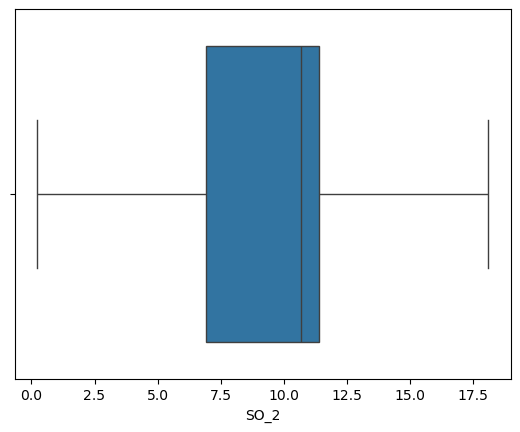

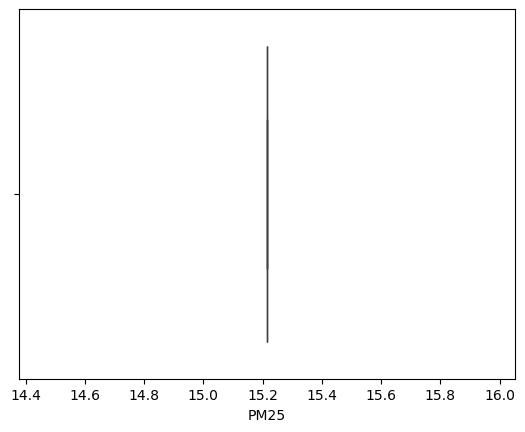

In [83]:
for i in ['BEN', 'CO', 'MXY', 'NMHC','SO_2', 'PM25']:
  sns.boxplot(data=df,x=i)
  plt.show()

####Data Before Cleaning Vs Data After Cleaning

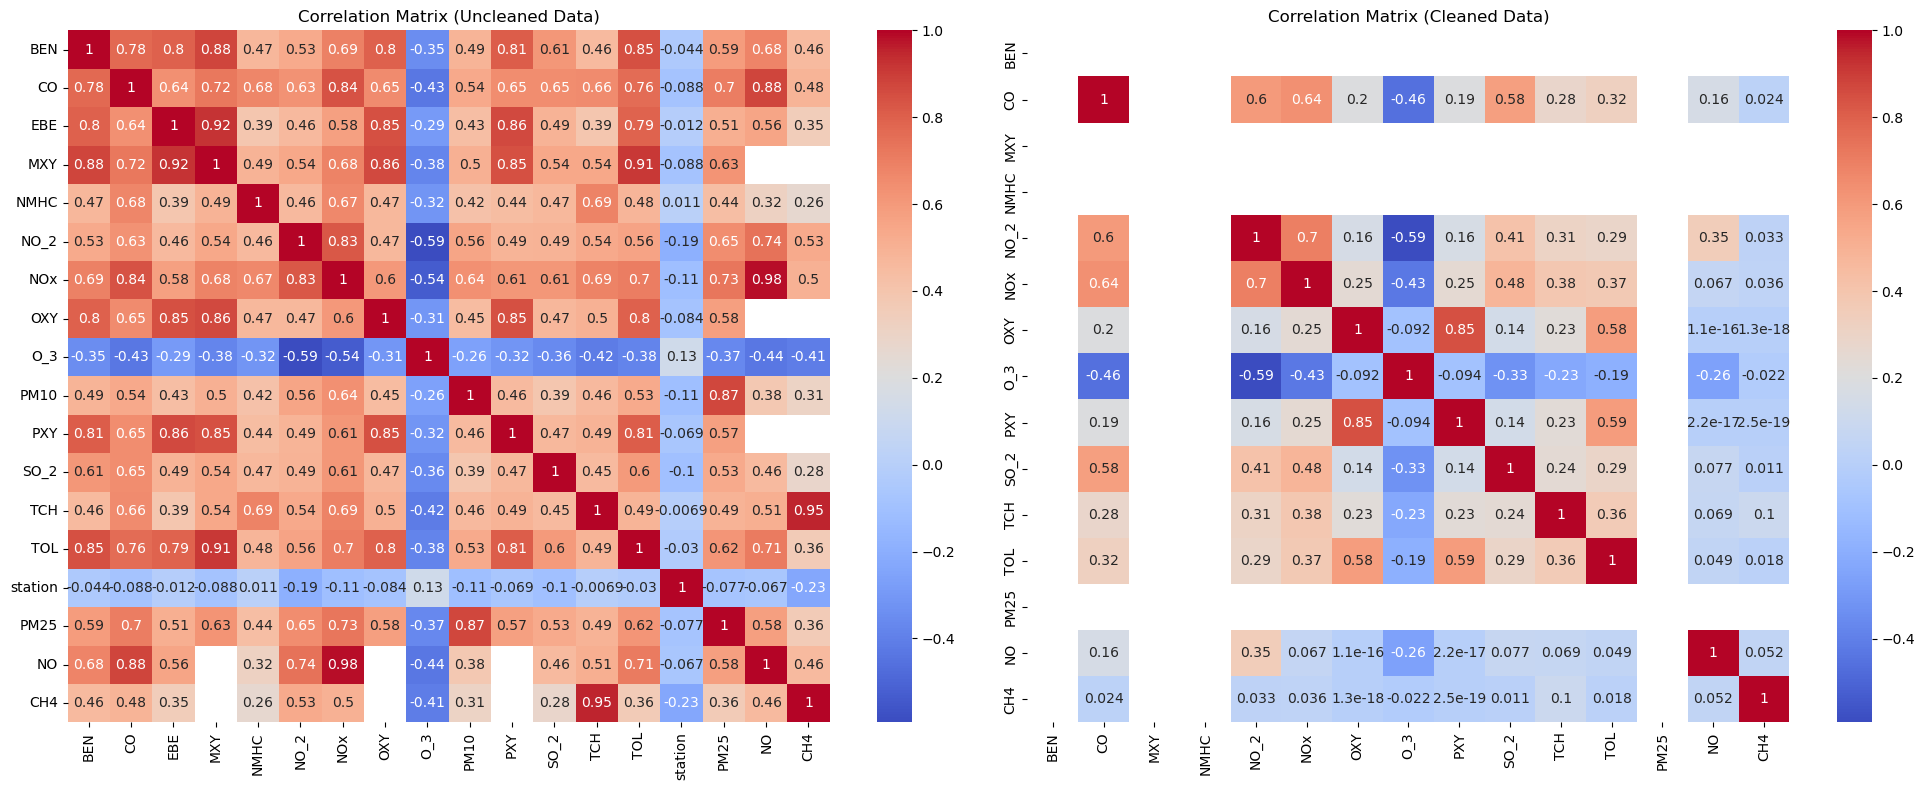

In [84]:

# Calculate correlation for uncleaned data
corr_uncleaned = df_init.select_dtypes(include='number').corr()

# Calculate correlation for cleaned data
corr_cleaned = df.select_dtypes(include='number').corr()

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for uncleaned data
sns.heatmap(corr_uncleaned, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix (Uncleaned Data)')

# Heatmap for cleaned data
sns.heatmap(corr_cleaned, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix (Cleaned Data)')

plt.tight_layout()
plt.show()

###Scalling the Data

In [85]:

# Select numeric columns (exclude 'date')
numeric_columns = df.select_dtypes(include=['number']).columns  # Selects only numeric columns

# Apply MinMax Scaling only to numeric columns
scaler = MinMaxScaler()
df_scaled = df.copy()  # Create a copy to keep the date column
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])  # Scale only numeric columns

# Display results
print("Data Before Scaling:")
print(df.head())

print("\nData After Scaling:")
print(df_scaled.head())


Data Before Scaling:
                 date       BEN    CO       MXY      NMHC       NO_2  \
0 2001-08-01 01:00:00  1.408621  0.37  4.660873  0.188623  58.400002   
1 2001-08-01 01:00:00  1.408621  0.34  4.660873  0.188623  56.250000   
2 2001-08-01 01:00:00  1.408621  0.28  4.660873  0.188623  50.660000   
3 2001-08-01 01:00:00  1.408621  0.47  4.660873  0.188623  69.790001   
4 2001-08-01 01:00:00  1.408621  0.39  4.660873  0.188623  22.830000   

         NOx       OXY        O_3       PXY  SO_2       TCH        TOL  \
0  87.150002  2.285244  34.529999  2.060257  6.34  1.437341   6.738967   
1  75.169998  2.110000  42.160000  1.730000  8.11  1.240000  10.820000   
2  61.380001  2.285244  46.310001  2.060257  7.85  1.437341   6.738967   
3  73.449997  2.285244  40.650002  2.060257  6.46  1.437341   6.738967   
4  24.799999  2.285244  66.309998  2.060257  8.80  1.437341   6.738967   

        PM25         NO       CH4  
0  15.214735  22.424536  1.307028  
1  15.214735  22.424536  1.30

###Splitting Datset

In [86]:

df["date"] = (df["date"] - df["date"].min()).dt.days  # Now 'date' is an integer

# Select only numeric columns
numeric_columns = df.columns

# Apply MinMax Scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# ✅ Convert to cuDF after fixing the date issue
df_scaled_cudf = cudf.DataFrame.from_pandas(df_scaled)

# Drop 'O_3' column for predictors (x) and set 'O_3' as target (y)
x = df_scaled_cudf.drop('O_3', axis=1)
y = df_scaled_cudf['O_3']

# Split the data using cuML's train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# ✅ Print to check if date values are retained
print(df_scaled_cudf.head())


       date  BEN        CO  MXY  NMHC      NO_2       NOx       OXY       O_3  \
0  0.033502  0.0  0.360976  0.0   0.0  0.092905  0.034352  0.022187  0.146314   
1  0.033502  0.0  0.331707  0.0   0.0  0.089485  0.029629  0.020485  0.178644   
2  0.033502  0.0  0.273171  0.0   0.0  0.080592  0.024194  0.022187  0.196229   
3  0.033502  0.0  0.458537  0.0   0.0  0.111025  0.028952  0.022187  0.172246   
4  0.033502  0.0  0.380488  0.0   0.0  0.036319  0.009775  0.022187  0.280975   

        PXY      SO_2       TCH       TOL  PM25        NO       CH4  
0  0.019436  0.341443  0.137151  0.027744   0.0  0.021793  0.330007  
1  0.016321  0.440436  0.118321  0.044545   0.0  0.021793  0.330007  
2  0.019436  0.425895  0.137151  0.027744   0.0  0.021793  0.330007  
3  0.019436  0.348154  0.137151  0.027744   0.0  0.021793  0.330007  
4  0.019436  0.479027  0.137151  0.027744   0.0  0.021793  0.330007  


#Model Train

### 1. Linear Regression

In [87]:

model1=LinearRegression()
model1.fit(x_train,y_train)

/home/t2420363/miniconda3/envs/rapids-23.12/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


LinearRegression()

In [88]:
y_predict=model1.predict(x_test)

Mean Absolute Error (MAE): 0.07840909070016719
Explained Variance Score: 0.3778554036259435
Mean of Residuals (in percentage): 0.008576722642561225%


<Axes: ylabel='Density'>

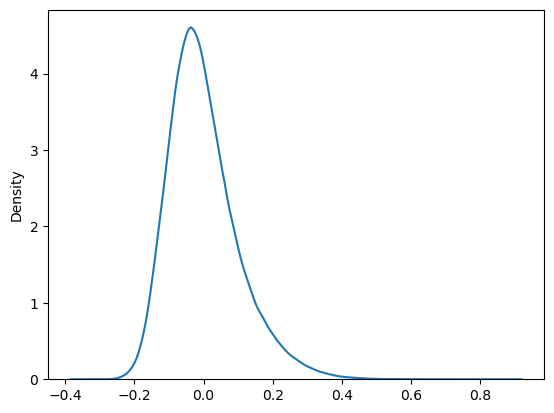

In [89]:
import cudf
import cupy as cp
import seaborn as sns
from cuml.metrics import mean_absolute_error

# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_test_gpu = y_test.to_cupy()  # Convert to cuPy array for GPU-based operations
y_predict_gpu1 = y_predict.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae1 = mean_absolute_error(y_test_gpu, y_predict_gpu1)

# Manually calculate Explained Variance Score
residuals1 = y_test_gpu - y_predict_gpu1
explained_variance1 = 1 - cp.var(residuals1) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae1}")
print(f"Explained Variance Score: {explained_variance1}")

# Residual Calculation
residue_gpu1 = residuals1
print(f"Mean of Residuals (in percentage): {residue_gpu1.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu1.get())  # .get() moves the data to CPU for plotting


### 2. Random Forest Regressor

In [90]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

/home/t2420363/miniconda3/envs/rapids-23.12/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


RandomForestRegressor()

In [91]:
y_predict2=model2.predict(x_test)

Mean Absolute Error (MAE): 0.054365879165510445
Explained Variance Score: 0.6569777279077411
Mean of Residuals (in percentage): -0.016778364519653213%


<Axes: ylabel='Density'>

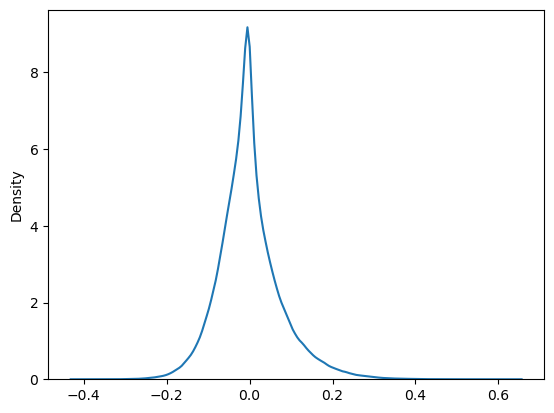

In [94]:

# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_predict_gpu2 = y_predict2.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae2 = mean_absolute_error(y_test_gpu, y_predict_gpu2)

# Manually calculate Explained Variance Score
residuals2 = y_test_gpu - y_predict_gpu2
explained_variance2 = 1 - cp.var(residuals2) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae2}")
print(f"Explained Variance Score: {explained_variance2}")

# Residual Calculation
residue_gpu2 = residuals2
print(f"Mean of Residuals (in percentage): {residue_gpu2.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu2.get())  # .get() moves the data to CPU for plotting


###5. Ridge Regressor

In [95]:
model5=Ridge(alpha=0.1)
model5.fit(x_train,y_train)


Ridge()

In [96]:
y_predict5=model5.predict(x_test)

Mean Absolute Error (MAE): 0.07840907961840278
Explained Variance Score: 0.37785554971487767
Mean of Residuals (in percentage): 0.008577632521984024%


<Axes: ylabel='Density'>

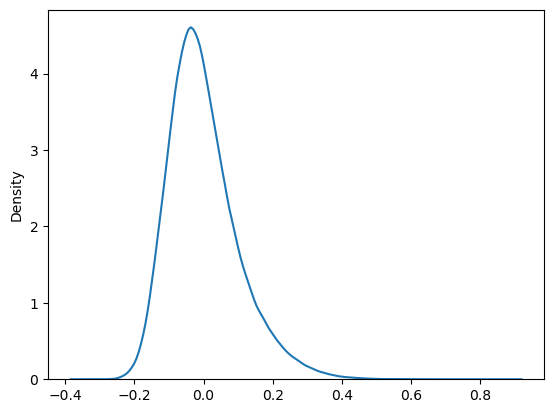

In [97]:


# Assuming y_test and y_predict are cuDF Series (GPU-based dataframes)
y_predict_gpu5 = y_predict5.to_cupy()

# Calculate MAE using cuML (GPU-based)
l_mae5 = mean_absolute_error(y_test_gpu, y_predict_gpu5)

# Manually calculate Explained Variance Score
residuals5 = y_test_gpu - y_predict_gpu5
explained_variance5 = 1 - cp.var(residuals5) / cp.var(y_test_gpu)

# Print the results
print(f"Mean Absolute Error (MAE): {l_mae5}")
print(f"Explained Variance Score: {explained_variance5}")

# Residual Calculation
residue_gpu5 = residuals5
print(f"Mean of Residuals (in percentage): {residue_gpu5.mean() * 100}%")

# Plotting the residuals (converting back to CPU for seaborn)
sns.kdeplot(x=residue_gpu5.get())  # .get() moves the data to CPU for plotting


#Performance Comparison

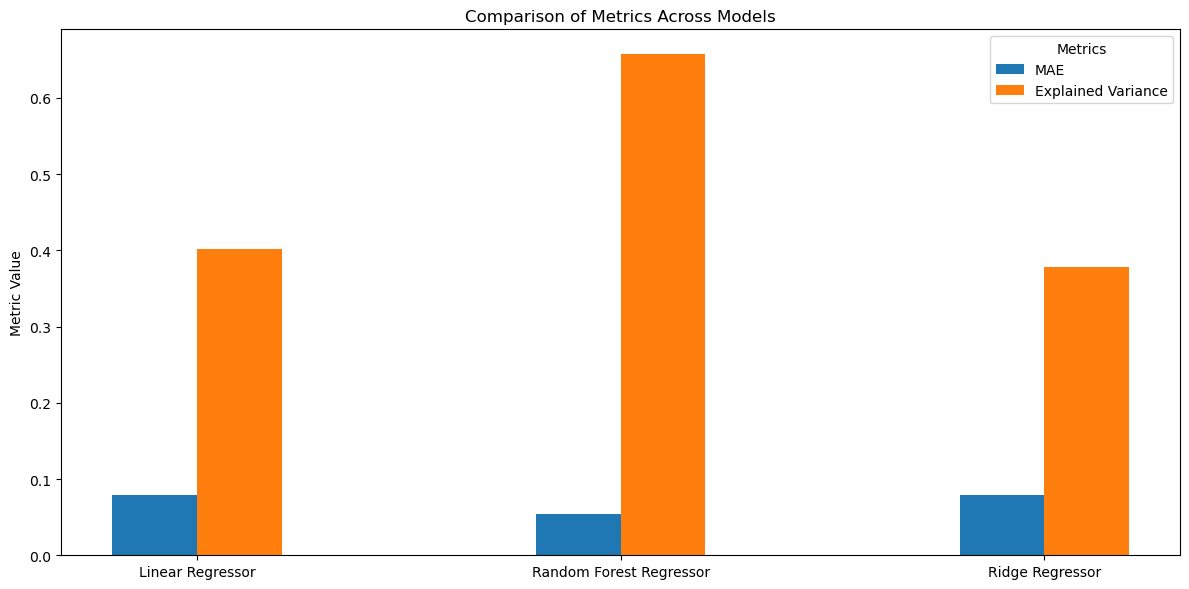

In [99]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Example values for metrics (ensure that these are CuPy arrays or GPU-based)Mean Absolute Error (MAE):


l_mae1 = cp.array([0.07840909070016719])  # Replace with actual GPU results
l_mae2 = cp.array([0.054365879165510445])
l_mae5 = cp.array([0.07840907961840278])

explained_variance1 = cp.array([0.40139815623400665])
explained_variance2 = cp.array([ 0.6569777279077411])
explained_variance5 = cp.array([0.3778554036259435])

# Convert CuPy arrays to NumPy arrays for compatibility with plotting
metric_values = np.array([
    [l_mae1.get()[0], l_mae2.get()[0], l_mae5.get()[0]],  # Access scalar values
    [explained_variance1.get()[0], explained_variance2.get()[0], explained_variance5.get()[0]],  # Access scalar values
])

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
model_names = ["Linear Regressor", "Random Forest Regressor", 'Ridge Regressor']
metrics = ["MAE", "Explained Variance"]
x = np.arange(len(model_names))

bar_width = 0.2
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, metric_values[i], width=bar_width, label=metric)

ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.set_ylabel("Metric Value")
ax.set_title("Comparison of Metrics Across Models")
ax.legend(title="Metrics")
plt.tight_layout()
plt.show()
